<h1>Machine Learning notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
filepath = '/Users/efkanturedi/Corteze/Python_output_folders/Ecommerce/final.csv'

master_df_clean = pd.read_csv(filepath)

In [3]:
master_df_clean

customer_unique_id  qty_of_products_bought  \
0     0c8dd93583b64079a749cb0874a9b73c               -0.231394   
1     58f58e001ee9414b521c2dc29632f0de               -0.231394   
2     8a11981cadf7feaab34826f59a3185c6               -0.231394   
3     ca49046caba6fd40df184027f34b42e3               -0.231394   
4     609094428132c6fdc75ab1c7e0f36b94               -0.231394   
...                                ...                     ...   
9691  4b69463d4a30fdba7171716504935ef7               -0.231394   
9692  533bb817850cf3ad1d6e1ab3adf39fb0               -0.231394   
9693  bef334a9b4cecae4dc0916d62a91dbbf               -0.231394   
9694  5b02d330ce52a5433874ed1dedc3b311                0.080000   
9695  774c075fecf66d485d49c837d03c71e9                0.080000   

      average_review_score  turnover_from_customer  x0_Appliances  x0_Arts  \
0                 0.701930               -0.211205            0.0      0.0   
1                 0.701930               -0.300012            0.0      0.0   
2                 0.701930               -0.255445            0.0      0.0   
3                 0.701930               -0.418809            0.0      0.0   
4                -0.023970               -0.315126            0.0      0.0   
...                    ...                     ...            ...      ...   
9691              0.701930               -0.335939            1.0      0.0   
9692             -0.749871               -0.344550            0.0      0.0   
9693              0.701930                0.115670            0.0      0.0   
9694             -0.023970               -0.080265            0.0      0.0   
9695             -1.475771                3.571804            0.0      0.0   

      x0_Auto  x0_Construction  x0_Electronics  x0_Fashion  x0_Food_drinks  \
0         0.0              0.0             0.0         0.0             0.0   
1         0.0              0.0             1.0         0.0             0.0   
2         0.0              0.0             1.0         0.0             0.0   
3         1.0              0.0             0.0         0.0             0.0   
4         0.0              0.0             0.0         0.0             0.0   
...       ...              ...             ...         ...             ...   
9691      0.0              0.0             0.0         0.0             0.0   
9692      0.0              0.0             0.0         0.0             0.0   
9693      0.0              0.0             0.0         0.0             0.0   
9694      0.0              0.0             1.0         0.0             0.0   
9695      0.0              1.0             0.0         0.0             0.0   

      x0_Garden_pets  x0_Health_beauty  x0_Home  x0_Office  x0_Other  \
0                0.0               0.0      0.0        0.0       0.0   
1                0.0               0.0      0.0        0.0       0.0   
2                0.0               0.0      0.0        0.0       0.0   
3                0.0               0.0      0.0        0.0       0.0   
4                0.0               0.0      1.0        0.0       0.0   
...              ...               ...      ...        ...       ...   
9691             0.0               0.0      0.0        0.0       0.0   
9692             0.0               1.0      0.0        0.0       0.0   
9693             0.0               0.0      0.0        0.0       1.0   
9694             0.0               0.0      0.0        0.0       0.0   
9695             0.0               0.0      0.0        0.0       0.0   

      x0_Sports_leisure  x1_Afternoon  x1_Dawn  x1_Morning  x1_Night  x2_Fri  \
0                   1.0           1.0      0.0         0.0       0.0     0.0   
1                   0.0           1.0      0.0         0.0       0.0     0.0   
2                   0.0           0.0      0.0         1.0       0.0     0.0   
3                   0.0           0.0      0.0         1.0       0.0     0.0   
4                   0.0           0.0      0.0         1.0       0.0     0.0   
...     

In [4]:
master_df_clean.set_index('customer_unique_id',inplace=True)

In [5]:
master_df_clean.isna().sum().sum()

0

In [6]:
master_df_clean.shape

(9696, 31)

In [7]:
master_df_clean = master_df_clean.dropna()

In [8]:
master_df_clean.shape

(9696, 31)

In [9]:
master_df_clean.isna().sum()

qty_of_products_bought    0
average_review_score      0
turnover_from_customer    0
x0_Appliances             0
x0_Arts                   0
x0_Auto                   0
x0_Construction           0
x0_Electronics            0
x0_Fashion                0
x0_Food_drinks            0
x0_Garden_pets            0
x0_Health_beauty          0
x0_Home                   0
x0_Office                 0
x0_Other                  0
x0_Sports_leisure         0
x1_Afternoon              0
x1_Dawn                   0
x1_Morning                0
x1_Night                  0
x2_Fri                    0
x2_Mon                    0
x2_Sat                    0
x2_Sun                    0
x2_Thu                    0
x2_Tue                    0
x2_Wed                    0
x3_boleto                 0
x3_credit_card            0
x3_debit_card             0
x3_voucher                0
dtype: int64

In [10]:
colonnes = master_df_clean.columns
table = pd.DataFrame(columns=['name','types'])
for col in colonnes:
  table = table.append(
    {
      'name': col,
      'types': master_df_clean[col].dtype
    }
  ,ignore_index=True)

In [11]:
table

name    types
0   qty_of_products_bought  float64
1     average_review_score  float64
2   turnover_from_customer  float64
3            x0_Appliances  float64
4                  x0_Arts  float64
5                  x0_Auto  float64
6          x0_Construction  float64
7           x0_Electronics  float64
8               x0_Fashion  float64
9           x0_Food_drinks  float64
10          x0_Garden_pets  float64
11        x0_Health_beauty  float64
12                 x0_Home  float64
13               x0_Office  float64
14                x0_Other  float64
15       x0_Sports_leisure  float64
16            x1_Afternoon  float64
17                 x1_Dawn  float64
18              x1_Morning  float64
19                x1_Night  float64
20                  x2_Fri  float64
21                  x2_Mon  float64
22                  x2_Sat  float64
23                  x2_Sun  float64
24                  x2_Thu  float64
25                  x2_Tue  float64
26                  x2_Wed  float64
27               x3_boleto  float64
28          x3_credit_card  float64
29           x3_debit_card  float64
30              x3_voucher  float64

<h2> PCA for pre-ML

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(random_state=1)

In [14]:
pca.fit(master_df_clean)

PCA(random_state=1)

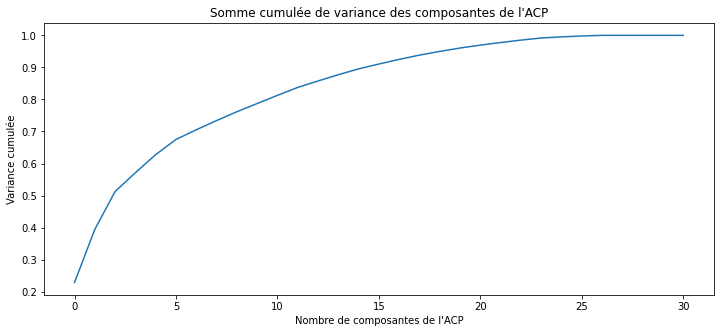

In [15]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(master_df_clean.shape[1])),
         np.cumsum(pca.explained_variance_ratio_))

In [16]:
np.cumsum(pca.explained_variance_ratio_)[20]

0.9694807632445924

In [17]:
colonnes_pca = master_df_clean.columns

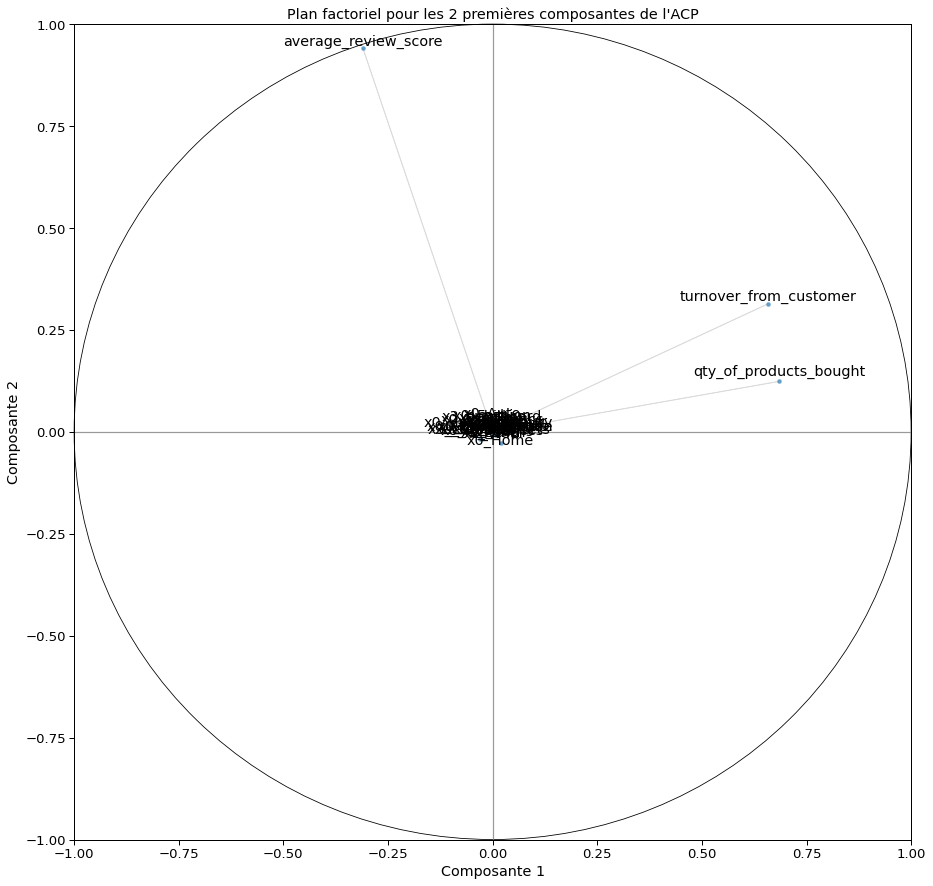

In [18]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', 
                    clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',
             alpha=0.2)


sns.set_context("paper", font_scale=1)

In [19]:
x_show = pca.transform(master_df_clean.select_dtypes(['float64','int32']))[:,0]

y_show = pca.transform(master_df_clean.select_dtypes(['float64','int32']))[:,1]

z_show = pca.transform(master_df_clean.select_dtypes(['float64','int32']))[:,2]

In [20]:
X_pca = pca.transform(master_df_clean)[:,:20]

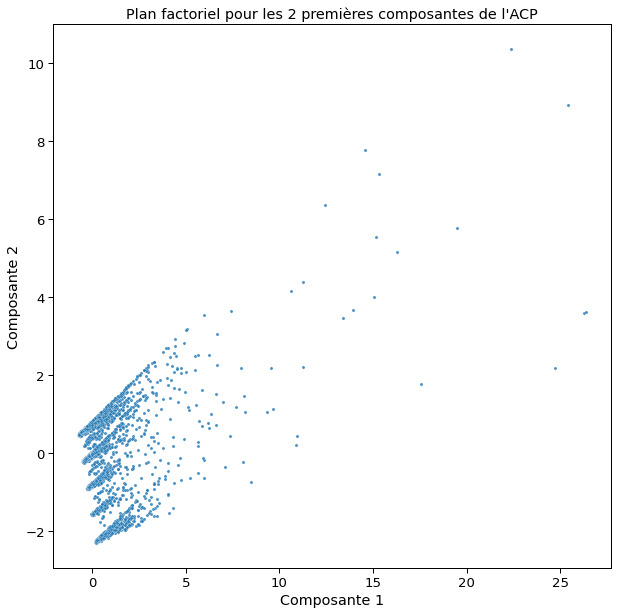

In [21]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = y_show,
                #hue = hue_show,
                alpha=0.8, s=10)

sns.set_context("paper", font_scale=1)

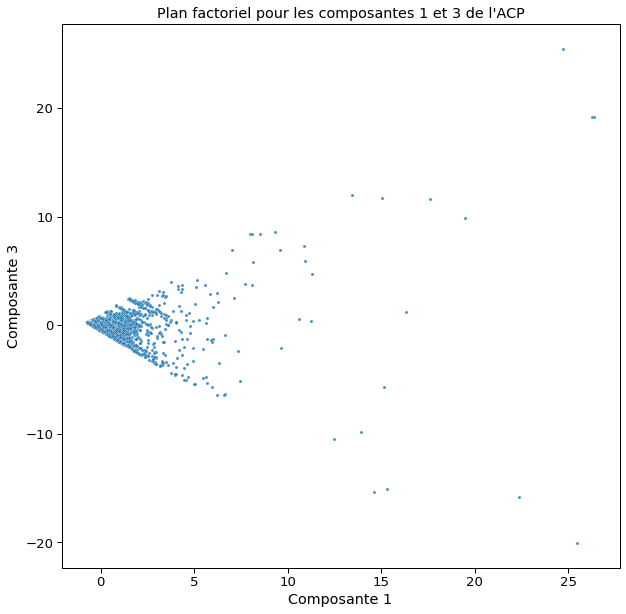

In [22]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les composantes 1 et 3 de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 3')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = z_show,
                #hue = hue_show,
                alpha=0.8, s=10)
sns.set_context("paper", font_scale=1)

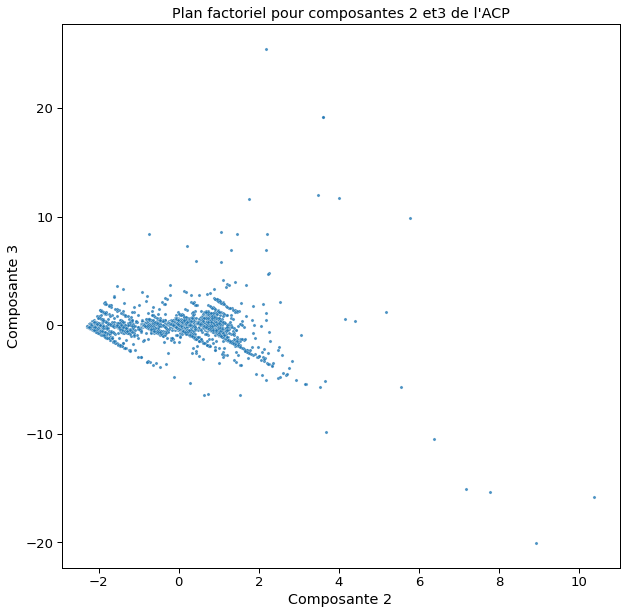

In [23]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour composantes 2 et3 de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 2')
plt.ylabel('Composante 3')
ax = plt.gca()

sns.scatterplot(x = y_show,
                y = z_show,
                #hue = X_pca,
                alpha=0.8, s=10)

sns.set_context("paper", font_scale=1)

<h2>T-SNE


In [24]:
from sklearn.manifold import TSNE

In [25]:
tsne = TSNE()
T = tsne.fit_transform(X_pca.copy())

/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Représentation du jeu de données via T-SNE'}>

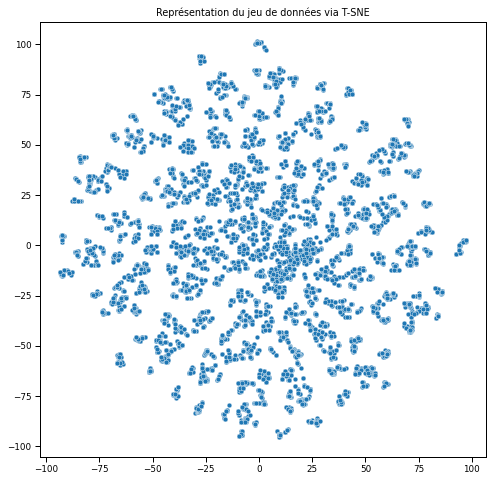

In [26]:
plt.figure(figsize=(8,8))
plt.title('Représentation du jeu de données via T-SNE')
sns.scatterplot(T[:,0], T[:,1])

<h2>KMeans

In [27]:
X_pca

array([[-5.30363176e-01,  5.66133495e-01,  5.87596171e-02, ...,
         8.84736591e-02, -2.30099565e-02, -1.60458265e-01],
       [-5.71109605e-01,  5.14950876e-01,  1.03737770e-01, ...,
         2.30767998e-02, -5.03061941e-02, -4.14127397e-02],
       [-5.48016415e-01,  5.47648636e-01,  7.23047432e-02, ...,
         1.08248843e-03, -6.61536890e-02, -4.83238032e-02],
       ...,
       [-3.09591901e-01,  6.87384483e-01, -1.65662645e-01, ...,
        -4.84848760e-02, -1.00058235e-01,  2.55502428e-01],
       [ 4.50507628e-04, -2.65277230e-02,  9.30912191e-02, ...,
         1.77342120e-02, -2.46183496e-02, -5.77685918e-02],
       [ 2.86478184e+00, -2.58274351e-01, -2.58994875e+00, ...,
        -6.48529714e-02, -2.64943377e-02,  9.88057269e-02]])

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
params = {
  'n_clusters': [10,11,12,13],
  'n_init':[2,3,4,5]
}

In [30]:
Kmeans_grid = GridSearchCV(estimator = KMeans(), 
                      scoring=silhouette_score,
                      param_grid = params,
                      cv=5,
                      verbose=False
                     )

Kmeans_grid.fit(X_pca)

/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
  File "/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/cluster/_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'n_clusters': [10, 11, 12, 13],
                         'n_init': [2, 3, 4, 5]},
             scoring=<function silhouette_score at 0x7ff2a3301040>,
             verbose=False)

In [31]:
Kmeans_grid.best_params_

{'n_clusters': 10, 'n_init': 2}

In [32]:
silhouette_score(X_pca,Kmeans_grid.best_estimator_.labels_)

0.1445858507314699

<h2>DBScan

In [33]:
from sklearn.cluster import DBSCAN

In [34]:
params_dbs = {
  'eps': [2,3,4,5,6],
  'min_samples':[2,3,4,5,6]
}

In [35]:
DBS_grid = GridSearchCV(estimator = DBSCAN(), 
                      scoring=silhouette_score,
                      param_grid = params_dbs,
                      cv=5,
                      verbose=False
                     )

DBS_grid.fit(X_pca)

/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
  File "/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/cluster/_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/

KeyboardInterrupt: 

In [ ]:
DBS_grid.best_params_

{'eps': 2, 'min_samples': 2}

In [ ]:
silhouette_score(X_pca,DBS_grid.best_estimator_.labels_)

0.4573296630066235